In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['figure.dpi'] = 300

from scipy.optimize import curve_fit

fts=12

In [ ]:
data = pd.read_csv('Extended Data Fig. 3 iteration convergence.csv')
data

,iteration,ho2_mean_glob,ch3o2_mean_glob,ch3ooh_mean_glob,ho2_mean_land,ch3o2_mean_land,ch3ooh_mean_land
0,0,1.007553e+08,6.801647e+07,6.754535e+09,3.192089e+07,1.516037e+07,6.948275e+08
1,1,1.015822e+08,8.711602e+07,8.242158e+09,3.959130e+07,1.594287e+07,8.776082e+08
2,2,9.951722e+07,9.253380e+07,8.443686e+09,3.969327e+07,1.619936e+07,8.982037e+08
3,3,9.901203e+07,9.354321e+07,8.451055e+09,3.975410e+07,1.623499e+07,9.024641e+08
4,4,9.891048e+07,9.362798e+07,8.444239e+09,3.975849e+07,1.624294e+07,9.031771e+08
5,5,9.890837e+07,9.359856e+07,8.441956e+09,3.975966e+07,1.624437e+07,9.033187e+08
6,6,9.891491e+07,9.358202e+07,8.441723e+09,3.975982e+07,1.624466e+07,9.033454e+08
7,7,9.891792e+07,9.357772e+07,8.441846e+09,3.975985e+07,1.624472e+07,9.033508e+08
8,8,9.891869e+07,9.357729e+07,8.441924e+09,3.975986e+07,1.624473e+07,9.033518e+08
9,9,9.891878e+07,9.357748e+07,8.441949e+09,3.975986e+07,1.624473e+07,9.033521e+08


In [6]:
def logistic_func(x, L, k, x0, C):
    return C + L / (1 + np.exp(-k*(x-x0)))

x_data = data['iteration']
y_data = data['ho2_mean_glob']*10**(-8)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('Global HO₂ fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])
print("C =", params[3])

Global HO₂ fitting parameters:
L = -0.022461261012193333
k = 19.893744311435192
x₀ = 1.948649049250658
C = 1.0116875027906898


In [8]:
def logistic_func(x, L, k, x0):
    return L / (1 + np.exp(-k*(x-x0)))
    
x_data = data['iteration']
y_data = data['ch3o2_mean_glob']*10**(-8)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('Global CH₃O₂ fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])

Global CH₃O₂ fitting parameters:
L = 0.9360441575128644
k = 1.6421426879114478
x₀ = -0.594620386309325


In [10]:
x_data = data['iteration']
y_data = data['ch3ooh_mean_glob']*10**(-10)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('Global CH₃OOH fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])

Global CH₃OOH fitting parameters:
L = 0.8443543270085393
k = 2.3472547230198546
x₀ = -0.5904126100431288


In [12]:
x_data = data['iteration']
y_data = data['ho2_mean_land']*10**(-8)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('ILS HO₂ fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])

ILS HO₂ fitting parameters:
L = 0.39756228052870884
k = 4.0636266159475545
x₀ = -0.345657052296741


In [14]:
x_data = data['iteration']
y_data = data['ch3o2_mean_land']*10**(-8)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('ILS CH₃O₂ fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])

ILS CH₃O₂ fitting parameters:
L = 0.16246194435496125
k = 1.3802978566225677
x₀ = -1.9084166834610163


In [16]:
x_data = data['iteration']
y_data = data['ch3ooh_mean_land']*10**(-10)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('ILS CH₃OOH fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])

ILS CH₃OOH fitting parameters:
L = 0.09032029474248644
k = 2.3101512262107367
x₀ = -0.5214261283327033


In [9]:
y1 = 1.0116875027906898 - 0.022461261012193333 / (1 + np.exp(-19.893744311435192*(data[['iteration']]-(0.948649049250658))))
y2 = 0.9360441575128644 / (1 + np.exp(-1.6421426879114478*(data[['iteration']]-(-0.594620386309325))))
y3 = 0.8443543270085393 / (1 + np.exp(-2.3472547230198546*(data[['iteration']]-(-0.5904126100431288))))
y4 = 0.39756228052870884 / (1 + np.exp(-4.0636266159475545*(data[['iteration']]-(-0.345657052296741))))
y5 = 0.16246194435496125 / (1 + np.exp(-1.3802978566225677*(data[['iteration']]-(-1.9084166834610163))))
y6 = 0.09032029474248644 / (1 + np.exp(-2.3101512262107367*(data[['iteration']]-(-0.5214261283327033))))

In [10]:
data['ho2_fit_glob'] = y1
data['ch3o2_fit_glob'] = y2
data['ch3ooh_fit_glob'] = y3
data['ho2_fit_land'] = y4
data['ch3o2_fit_land'] = y5
data['ch3ooh_fit_land'] = y6

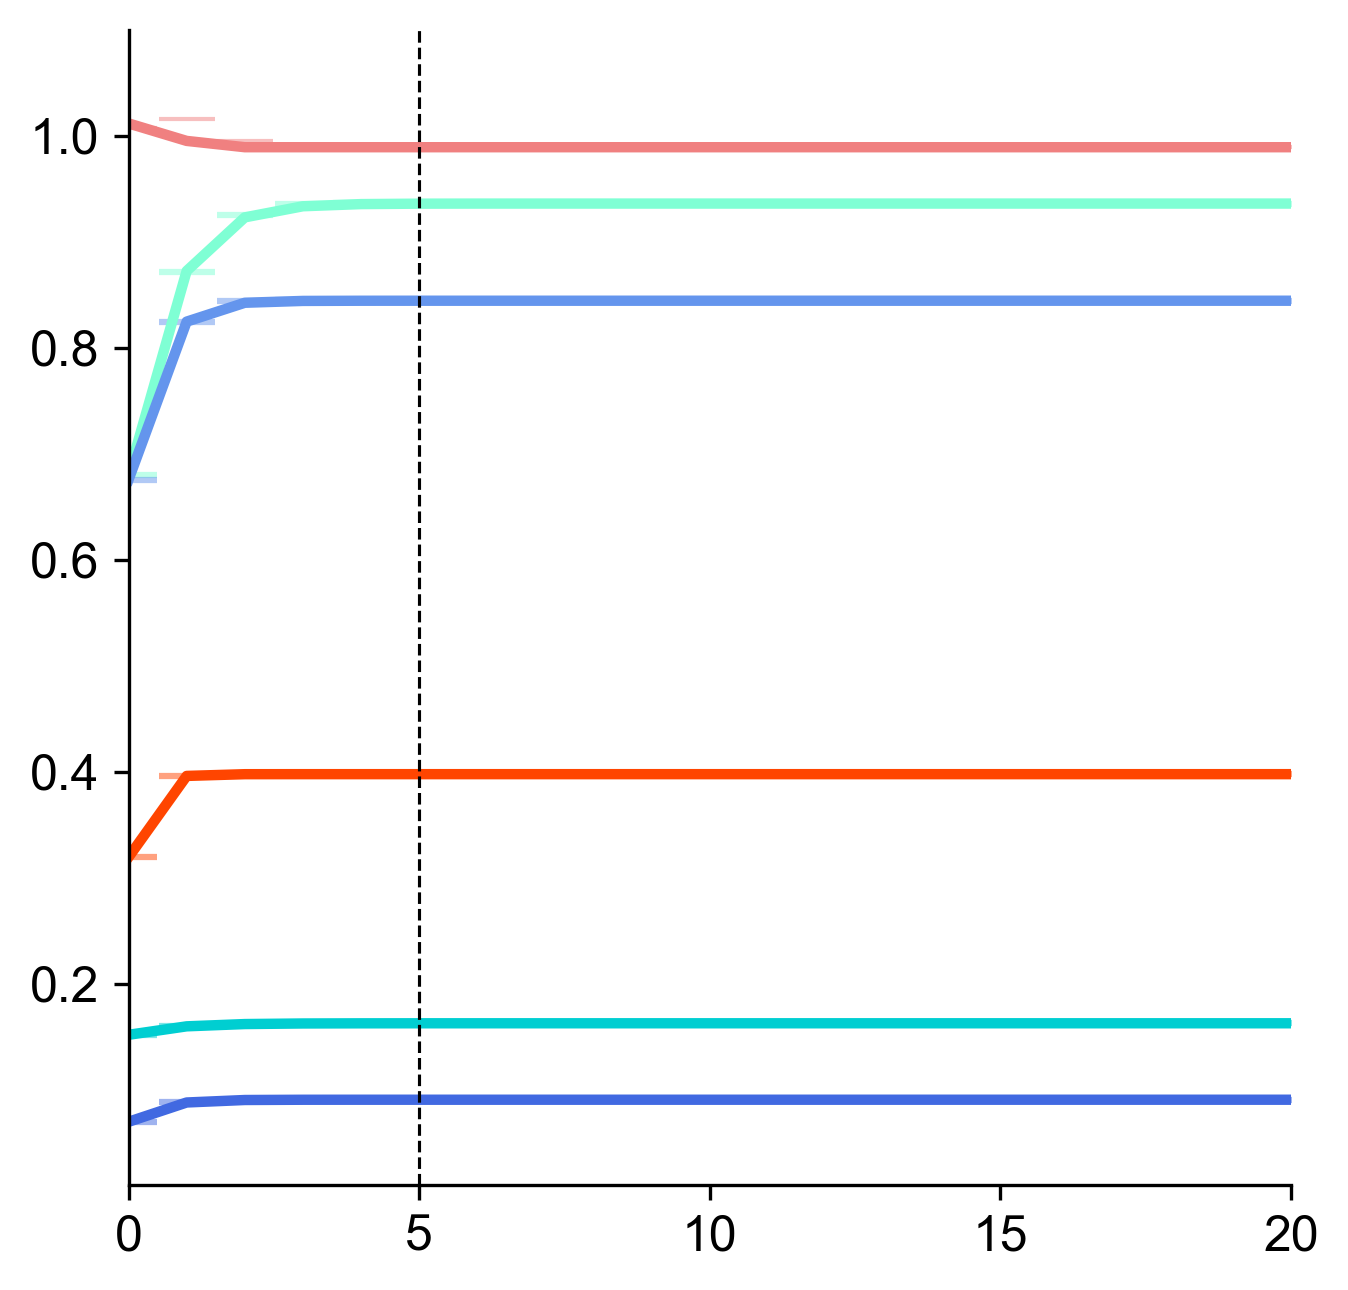

In [11]:
matplotlib.rcParams['font.family'] = "Arial"
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

size = 175
a = 0.5

#plt.plot(data['iteration'], data['ho2_mean_glob']*10**(-8), markersize=size, c=None, alpha=0.5, marker="o")
#plt.plot(data['iteration'], data['ch3o2_mean_glob']*10**(-8), markersize=size, c=None, alpha=0.5, marker="o")
#plt.plot(data['iteration'], data['ho2_mean_land']*10**(-8), markersize=size, c=None, alpha=0.5, marker="o")
#plt.plot(data['iteration'], data['ch3o2_mean_land']*10**(-8), markersize=size, c=None, alpha=0.5, marker="o")

plt.scatter(data['iteration'], data['ho2_mean_glob']*10**(-8), s=size, edgecolor="black", c="lightcoral", alpha=a, marker="_", linewidth=1)
plt.scatter(data['iteration'], data['ch3o2_mean_glob']*10**(-8), s=size, edgecolor="black", c="aquamarine", alpha=a, marker="_")
plt.scatter(data['iteration'], data['ch3ooh_mean_glob']*10**(-10), s=size, edgecolor="black", c="cornflowerblue", alpha=a, marker="_")

plt.scatter(data['iteration'], data['ho2_mean_land']*10**(-8), s=size, edgecolor="black", c="orangered", alpha=a, marker="_")
plt.scatter(data['iteration'], data['ch3o2_mean_land']*10**(-8), s=size, edgecolor="black", c="darkturquoise", alpha=a, marker="_")
plt.scatter(data['iteration'], data['ch3ooh_mean_land']*10**(-10), s=size, edgecolor="black", c="royalblue", alpha=a, marker="_")

plt.plot(data['iteration'], data['ho2_fit_glob'], c="lightcoral", linewidth=2.5)
plt.plot(data['iteration'], data['ch3o2_fit_glob'], c="aquamarine", linewidth=2.5)
plt.plot(data['iteration'], data['ch3ooh_fit_glob'], c="cornflowerblue", linewidth=2.5)

plt.plot(data['iteration'], data['ho2_fit_land'], c="orangered", linewidth=2.5)
plt.plot(data['iteration'], data['ch3o2_fit_land'], c="darkturquoise", linewidth=2.5)
plt.plot(data['iteration'], data['ch3ooh_fit_land'], c="royalblue", linewidth=2.5)

plt.xlim([0,20])
plt.ylim([0.01, 1.1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks([0,5,10,15,20], fontsize=fts)
plt.yticks([0.2,0.4,0.6,0.8,1.0], fontsize=fts)

plt.axvline(x=5, linestyle = '--', linewidth=0.75, color="black")
#plt.axhline(y=0.9891873, linestyle = '--', linewidth=0.5)
#plt.axhline(y=0.9357764, linestyle = '--', linewidth=0.5)
#plt.axhline(y=0.3975986, linestyle = '--', linewidth=0.5)
#plt.axhline(y=0.1624473, linestyle = '--', linewidth=0.5)

plt.savefig("Extended Data Fig. 2a.pdf", format="pdf", bbox_inches="tight")

In [ ]:
eval = pd.read_csv('Extended Data Fig. 3 radical evaluation.csv')
eval

,longitude,latitude,t,o1d_mod_mole,ho2_mod_mole,ch3o2_mod_mole,o1d_approx,ho2_approx,ch3o2_approx
0,69.0,-49.0,1.0,0.007244,7.000262e+07,5.897483e+07,0.007691,6.988763e+07,5.853638e+07
1,169.0,-45.0,1.0,0.010655,8.383001e+07,3.226882e+07,0.010184,7.663964e+07,3.466548e+07
2,171.0,-45.0,1.0,0.013255,1.068843e+08,3.491219e+07,0.013175,9.355119e+07,4.638868e+07
3,147.0,-43.0,1.0,0.015605,1.275836e+08,5.322283e+07,0.018516,1.187045e+08,6.081022e+07
4,171.0,-43.0,1.0,0.012477,9.561708e+07,4.165986e+07,0.012607,8.337157e+07,4.738140e+07
...,...,...,...,...,...,...,...,...,...
232315,-35.0,83.0,60.0,0.000000,2.268721e+05,2.813364e+06,0.000052,2.283659e+05,2.098707e+06
232316,-31.0,83.0,60.0,0.000000,2.085045e+05,1.750890e+06,0.000052,2.057863e+05,1.247564e+06
232317,-29.0,83.0,60.0,0.000000,1.372534e+05,9.941661e+05,0.000052,1.349590e+05,7.208403e+05
232318,-27.0,83.0,60.0,0.000000,7.938215e+04,1.364907e+06,0.000052,7.897664e+04,9.476872e+05


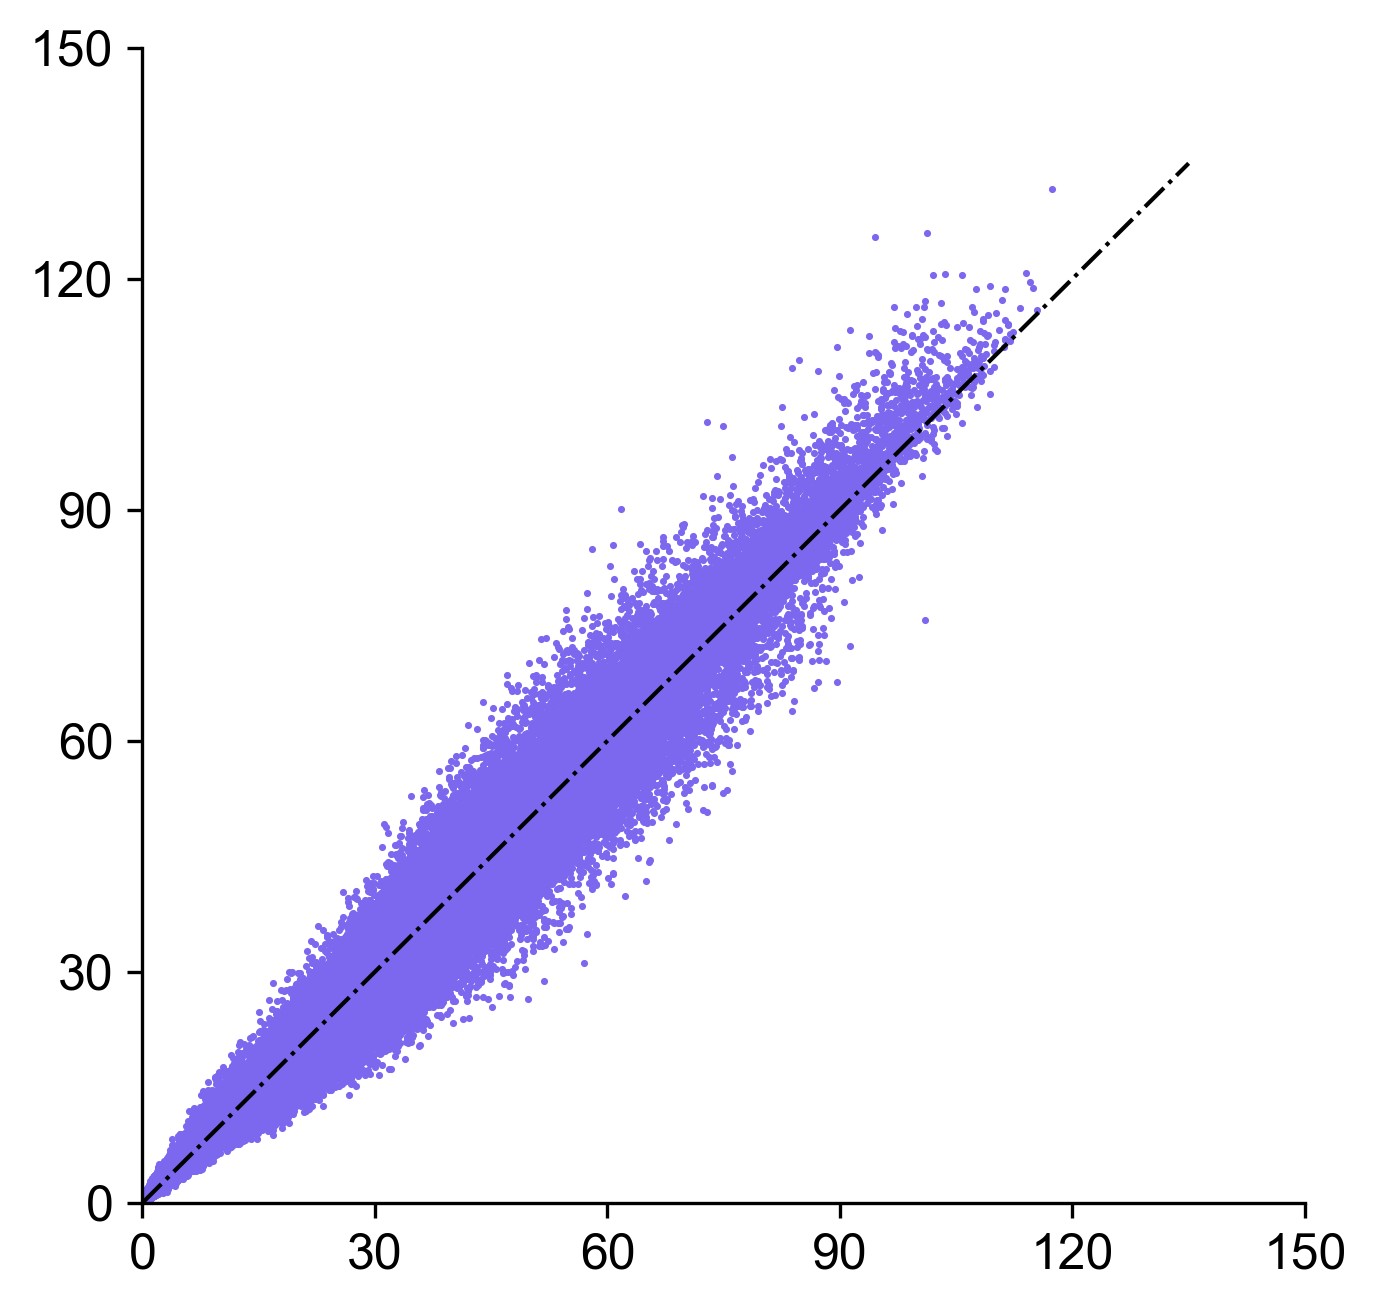

In [20]:
x = eval['o1d_approx']*10**3
y = eval['o1d_mod_mole']*10**3

fig, ax = plt.subplots(figsize = [5,5], dpi = 300)
fig = ax.scatter(x, y, s = 0.5, marker='o', c='mediumslateblue')
ax.plot([0,0.9],[0,0.9], transform=ax.transAxes, color='black', lw=1, linestyle='-.')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks([0,30,60,90,120,150], fontsize=fts)
plt.yticks([0,30,60,90,120,150], fontsize=fts)
plt.xlim((0,150))
plt.ylim((0,150))

plt.savefig("Extended Data Fig. 2b.pdf", format="pdf", bbox_inches="tight")

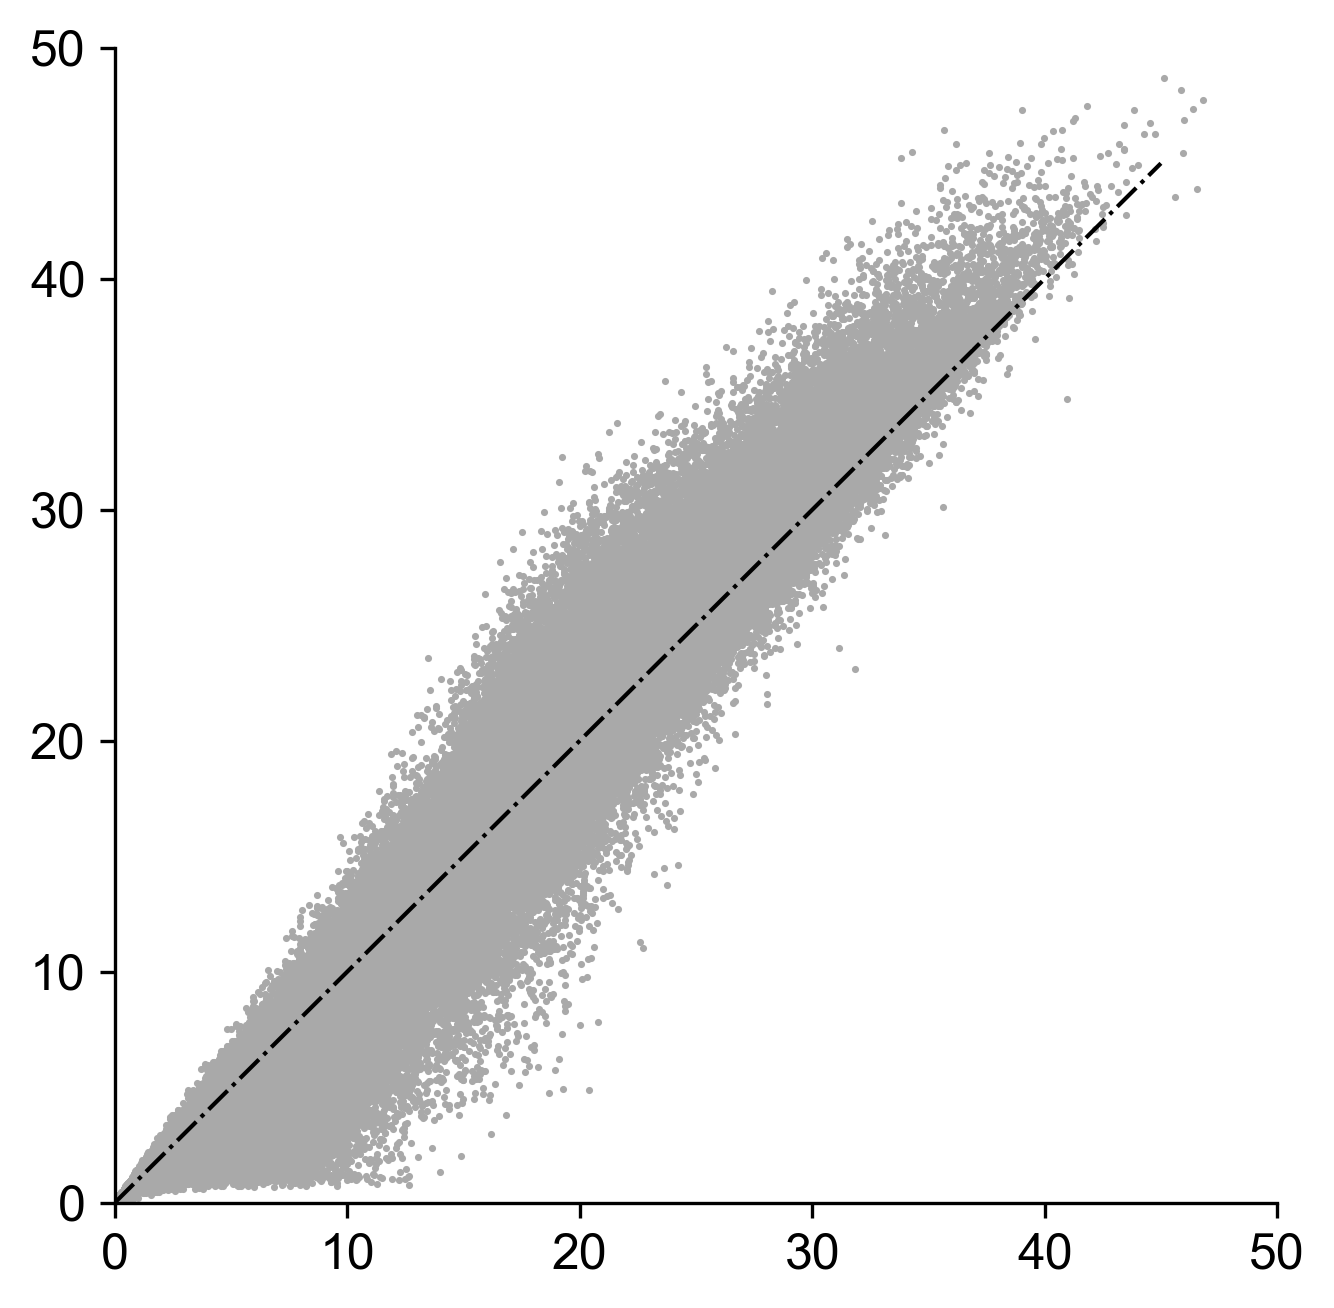

In [21]:
x = eval['ho2_approx']*10**(-7)
y = eval['ho2_mod_mole']*10**(-7)

fig, ax = plt.subplots(figsize = [5,5], dpi = 300)
fig = ax.scatter(x, y, s = 0.5, marker='o', c='darkgrey')
ax.plot([0,0.9],[0,0.9], transform=ax.transAxes, color='black', lw=1, linestyle='-.')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontsize=fts)
plt.yticks(fontsize=fts)
plt.xlim((0,50))
plt.ylim((0,50))

plt.savefig("Extended Data Fig. 2c.pdf", format="pdf", bbox_inches="tight")

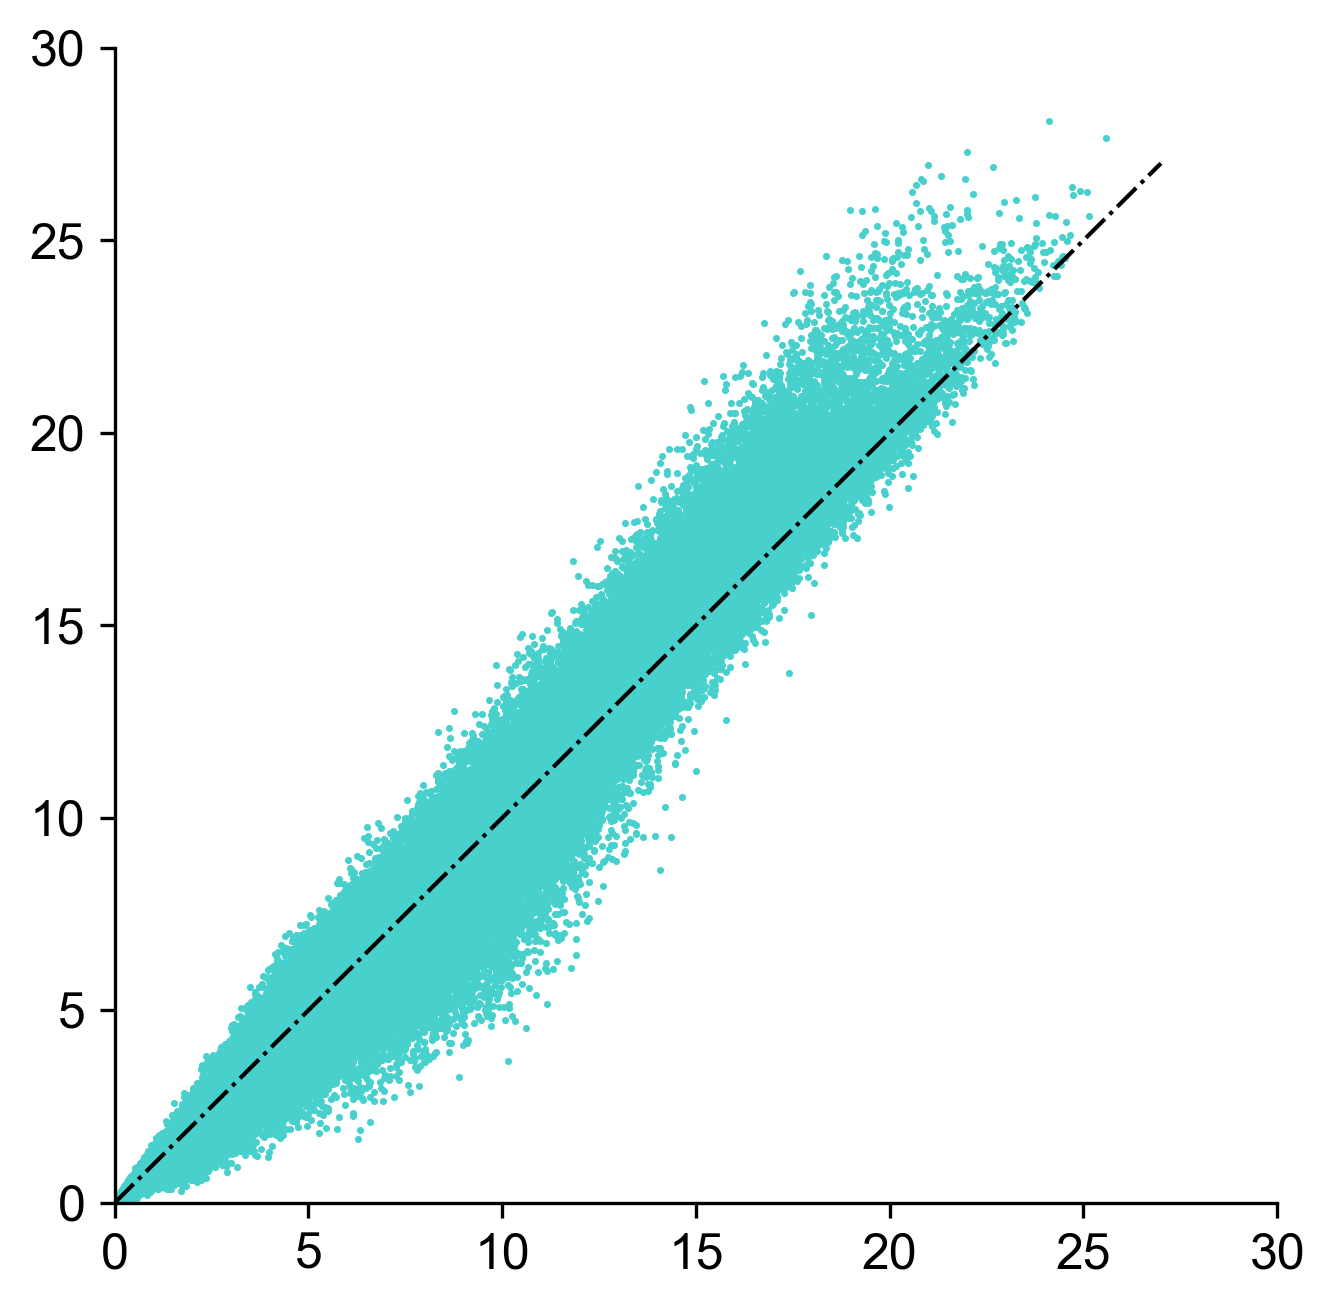

In [28]:
x = eval['ch3o2_approx']*10**(-7)
y = eval['ch3o2_mod_mole']*10**(-7)

fig, ax = plt.subplots(figsize = [5,5], dpi = 300)
fig = ax.scatter(x, y, s = 0.5, marker='o', c='mediumturquoise')
ax.plot([0,0.9],[0,0.9], transform=ax.transAxes, color='black', lw=1, linestyle='-.')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontsize=fts)
plt.yticks(fontsize=fts)
plt.xlim((0,30))
plt.ylim((0,30))

plt.savefig("Extended Data Fig. 2d.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Report precise evaluation metrics

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2

In [26]:
x = eval[['o1d_approx']]*10**3
y = eval['o1d_mod_mole']*10**3

print("O(¹D) R²: "+str(np.round(R2(x,y),4)))
print("O(¹D) RMSE: "+str(np.round(np.sqrt(MSE(x,y)),2)))
print("O(¹D) MAE: "+str(np.round(MAE(x,y),2)))

glm = LinearRegression()
glm.fit(x,y)
print("k: "+str(np.round(glm.coef_,2)))
print("b: "+str(np.round(glm.intercept_,2)))

O(¹D) R²: 0.9858
O(¹D) RMSE: 2.55
O(¹D) MAE: 1.39
k: [1.]
b: -0.08


In [27]:
x = eval[['ho2_approx']]*10**(-7)
y = eval['ho2_mod_mole']*10**(-7)

print("HO₂ R²: "+str(np.round(R2(x,y),4)))
print("HO₂ RMSE: "+str(np.round(np.sqrt(MSE(x,y)),2)))
print("HO₂ MAE: "+str(np.round(MAE(x,y),2)))

glm = LinearRegression()
glm.fit(x,y)
print("k: "+str(np.round(glm.coef_,2)))
print("b: "+str(np.round(glm.intercept_,2)))

HO₂ R²: 0.9588
HO₂ RMSE: 1.95
HO₂ MAE: 1.24
k: [1.06]
b: -0.74


In [28]:
x = eval[['ch3o2_approx']]*10**(-7)
y = eval['ch3o2_mod_mole']*10**(-7)

print("CH₃O₂ R²: "+str(np.round(R2(x,y),4)))
print("CH₃O₂ RMSE: "+str(np.round(np.sqrt(MSE(x,y)),2)))
print("CH₃O₂ MAE: "+str(np.round(MAE(x,y),2)))

glm = LinearRegression()
glm.fit(x,y)
print("k: "+str(np.round(glm.coef_,2)))
print("b: "+str(np.round(glm.intercept_,2)))

CH₃O₂ R²: 0.9756
CH₃O₂ RMSE: 0.8
CH₃O₂ MAE: 0.48
k: [1.03]
b: -0.18
